<a href="https://colab.research.google.com/github/SandeepH2706/IITM_MLT/blob/main/Week_2_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

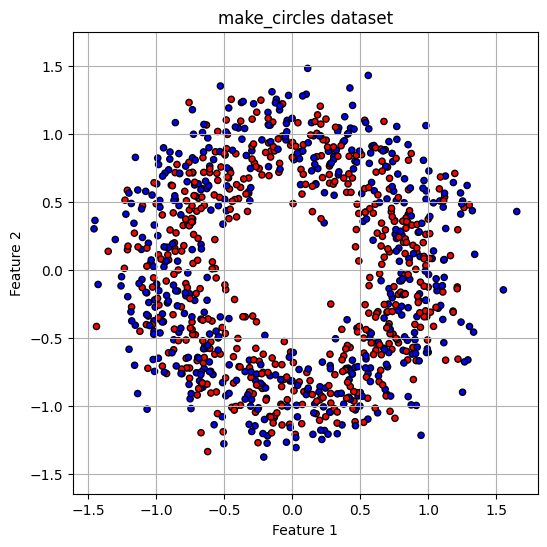

In [5]:


plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=20, edgecolors='k')
plt.title("make_circles dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.axis('equal')
plt.show()

## Problem 2
How many samples are there in the dataset?


In [6]:
print(X.shape)

(1000, 2)


## Problem 3
How many features are there in the dataset?

In [ ]:
# Enter your solution here
2

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [10]:

def polynomial_kernel(x1, x2, degree=2):
  return (np.dot(x1, x2))**degree

# Calculate the kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))

for i in range(n_samples):
  for j in range(n_samples):
    K[i, j] = polynomial_kernel(X[i], X[j], degree=2)

# Calculate the conversion quantity
sum_of_squares = np.sum(K**2)
conversion_quantity = np.sqrt(sum_of_squares) / n_samples

print(f"{conversion_quantity:.2f}")

0.70


## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [11]:
def gaussian_kernel(x1, x2, sigma=2):
  return np.exp(-np.sum((x1 - x2)**2) / (2 * sigma**2))

# Calculate the kernel matrix
n_samples = X.shape[0]
K_gaussian = np.zeros((n_samples, n_samples))

for i in range(n_samples):
  for j in range(n_samples):
    K_gaussian[i, j] = gaussian_kernel(X[i], X[j], sigma=2)

# Calculate the conversion quantity
sum_of_squares_gaussian = np.sum(K_gaussian**2)
conversion_quantity_gaussian = np.sqrt(sum_of_squares_gaussian) / n_samples

print(f"{conversion_quantity_gaussian:.2f}")


0.81


## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [12]:
# Center the kernel matrix K from Problem 4
n = K.shape[0]
one_n = np.ones((n, n)) / n
KC = K - one_n @ K - K @ one_n + one_n @ K @ one_n

# Calculate the conversion quantity for the centered matrix KC
sum_of_squares_kc = np.sum(KC**2)
conversion_quantity_kc = np.sqrt(sum_of_squares_kc) / n

print(f"{conversion_quantity_kc:.2f}")

0.41


## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [17]:
# Center the kernel matrix
n = K.shape[0]
one_n = np.ones((n, n)) / n
KC = K - one_n @ K - K @ one_n + one_n @ K @ one_n

# Compute eigenvalues and eigenvectors of the centered kernel matrix
eigenvalues, eigenvectors = np.linalg.eigh(KC)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the top 2 principal components
principal_components = sorted_eigenvectors[:, :2]


alpha_beta = principal_components @ np.diag(np.sqrt(sorted_eigenvalues[:2]))

# The projections are the rows of alpha_beta.
alpha = alpha_beta[:, 0]
beta = alpha_beta[:, 1]

# Calculate the conversion quantity: 1/n * sum(|alpha_i|) + 1/n * sum(|beta_i|)
conversion_quantity = (np.sum(np.abs(alpha)) / n) + (np.sum(np.abs(beta)) / n)

print(f"{conversion_quantity:.2f}")


0.88
